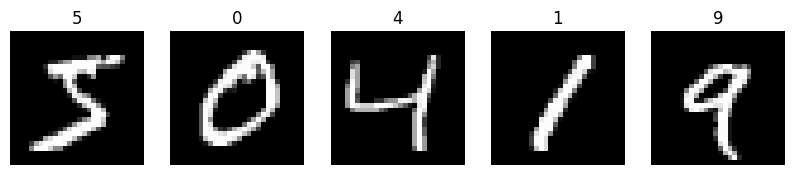

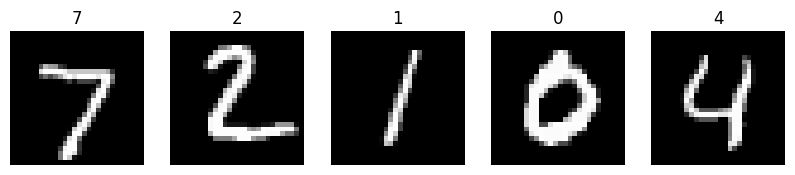

In [16]:
#Load Dataset 
 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import struct 
import pandas as pd 
 
# === Step 1: Load MNIST Dataset === 
def load_mnist_images(filename): 
    with open(filename, 'rb') as f: 
        _, num, rows, cols = struct.unpack(">IIII", f.read(16)) 
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows * cols) 
        return images / 255.0 
 
def load_mnist_labels(filename): 
    with open(filename, 'rb') as f: 
        _, num = struct.unpack(">II", f.read(8)) 
        labels = np.frombuffer(f.read(), dtype=np.uint8) 
        return labels 
 # Students can experiment to modify number of Train 
X_train = load_mnist_images("train-images.idx3-ubyte___")[:500]
y_train = load_mnist_labels("train-labels.idx1-ubyte___")[:500] 
X_test = load_mnist_images("t10k-images.idx3-ubyte___")[:200] 
y_test = load_mnist_labels("t10k-labels.idx1-ubyte___")[:200]

def plot_images(images, labels): 
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5)) 
    for i, (image, label) in enumerate(zip(images, labels)): 
        axes[i].imshow(image.reshape(28, 28), cmap='gray') 
        axes[i].axis('off') 
        axes[i].set_title(label) 
    plt.show()

plot_images(X_train[:5], y_train[:5])

plot_images(X_test[:5], y_test[:5])


In [5]:
# === Step 2: Activation Functions (Refer to Eq. 6.14 - 6.18) === 
def relu(x): 
    return np.maximum(0, x)
def tanh(x): 
    return np.tanh(x) 
def softplus(x): 
    return np.log(1 + np.exp(x))
def leaky_relu(x, alpha=0.1): 
    return np.maximum(alpha * x, x)
 
def one_hot(y, num_classes=10): # Refer to Equation 6.36 
    return np.eye(num_classes)[y]
def cross_entropy(y_pred, y_true): # Refer to Equation 6.36 
    return -np.sum(y_true * np.log(y_pred), axis=1)
def softmax(a): # Refer to Equation 6.37 
    exp_a = np.exp(a - np.max(a, axis=1, keepdims=True))
    return exp_a / np.sum(exp_a, axis=1, keepdims=True)
 
def forward_pass(X, weights, activations): # Forward Pass (Eq. 6.19) === 
    a = X 
    for W, activation in zip(weights, activations): 
        a = np.dot(a, W) 
        if activation == 'relu': 
            a = relu(a) 
        elif activation == 'tanh': 
            a = tanh(a) 
        elif activation == 'softplus': 
            a = softplus(a) 
        elif activation == 'leaky_relu': 
            a = leaky_relu(a) 
    return a

In [7]:
np.random.seed(42) 
input_size = 784 
hidden1 = 64 
hidden2 = 32 
output_size = 10 
epochs = 30 
best_loss = float('inf') 
best_weights = None

for epoch in range(epochs): 
    # TODO: Randomly initialize weights for each layer 
    W1 = np.random.randn(input_size, hidden1)
    W2 = np.random.randn(hidden1, hidden2)
    W3 = np.random.randn(hidden2, output_size)
 
    weights = [W1, W2, W3] 
    activations = [relu, relu, softmax]  # Students can experiment to modify

In [8]:
# === Step 4: Evaluation Metrics (Confusion Matrix, ROC, etc) === 
def compute_confusion_matrix(y_true, y_pred, num_classes=10): 
    cm = np.zeros((num_classes, num_classes)) 
    for i in range(len(y_true)): 
        cm[y_true[i], y_pred[i]] += 1 
    return cm

# === ROC Curve === 
def compute_roc(y_true, y_scores):
    fpr = []
    tpr = []
    thresholds = np.unique(y_scores)
    for threshold in thresholds:
        y_pred = [1 if i > threshold else 0 for i in y_scores]
        cm = compute_confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
    return fpr, tpr
 
# === Classification Report === Print TP, FP, FN, TN, precision, recall, f1, accuracy 
def compute_metrics(cm):
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    fn = np.sum(cm, axis=1) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return tp, fp, fn, tn, precision, recall, f1, accuracy
 
print("=== Classification Report === Print TP, FP, FN, TN, precision, recall, f1 for each class and overall accuracy")

=== Classification Report === Print TP, FP, FN, TN, precision, recall, f1 for each class and overall accuracy


C:\Users\user1\AppData\Local\Temp\ipykernel_15368\2127079151.py:27: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)
C:\Users\user1\AppData\Local\Temp\ipykernel_15368\2127079151.py:29: RuntimeWarning: invalid value encountered in divide
  f1 = 2 * (precision * recall) / (precision + recall)


TP:  [0. 7. 1. 2. 0. 0. 0. 6. 0. 9.]


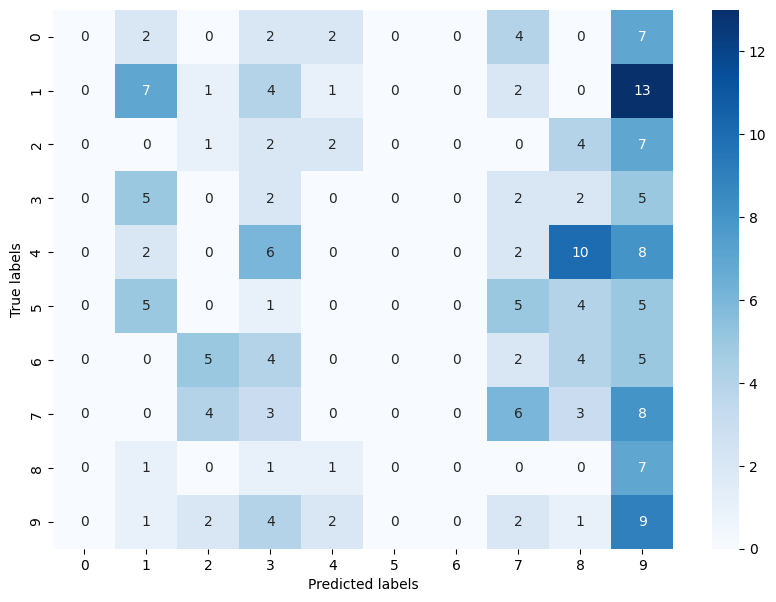

In [13]:

y_pred = forward_pass(X_test, weights, activations)
y_pred = np.argmax(y_pred, axis=1)
cm = compute_confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
tp, fp, fn, tn, precision, recall, f1, accuracy = compute_metrics(cm)
print("TP: ", tp)

